<a href="https://colab.research.google.com/github/Cado87/FasterViT/blob/main/FasterViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Cado87/FasterViT

Cloning into 'FasterViT'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 31 (delta 12), reused 14 (delta 2), pack-reused 0
Receiving objects: 100% (31/31), 51.60 KiB | 3.44 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
cd FasterViT

/content/FasterViT


In [3]:
ls

config.py    engine.py        inference_image.py  metrics.py  requirements.txt       train.py
datasets.py  FasterViT.ipynb  inference_video.py  README.md   segmentation_model.py  utils.py


In [4]:
#!pip install fastervit

In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 77.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_6

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#%cd '/content/drive/My Drive/weights'
#!ls

In [8]:
#from google.colab import files
#files.download('weights')

In [9]:
import shutil
import os

# Define paths
source_folder = '/content/drive/My Drive/FasterViT/weights'
destination_folder = '/content/FasterViT/weights'

# Create the destination folder in Colab
#if not os.path.exists(destination_folder):
#   os.makedirs(destination_folder)

# Copy the folder from Google Drive to Colab
shutil.copytree(source_folder, destination_folder)

'/content/FasterViT/weights'

In [10]:
#!ls /content/FasterViT/outputs
os.makedirs('/content/FasterViT/outputs')
!cp /content/drive/MyDrive/FasterViT/best_model_iou.pth /content/FasterViT/outputs

In [11]:
!unzip '/content/drive/My Drive/FasterViT/input' -d '/content/FasterViT/input'

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: /content/FasterViT/input/leaf_disease_segmentation/aug_data/train_images/00484_3.jpg  
  inflating: /content/FasterViT/input/leaf_disease_segmentation/aug_data/train_images/00484_4.jpg  
  inflating: /content/FasterViT/input/leaf_disease_segmentation/aug_data/train_images/00485_0.jpg  
  inflating: /content/FasterViT/input/leaf_disease_segmentation/aug_data/train_images/00485_1.jpg  
  inflating: /content/FasterViT/input/leaf_disease_segmentation/aug_data/train_images/00485_2.jpg  
  inflating: /content/FasterViT/input/leaf_disease_segmentation/aug_data/train_images/00485_3.jpg  
  inflating: /content/FasterViT/input/leaf_disease_segmentation/aug_data/train_images/00486_0.jpg  
  inflating: /content/FasterViT/input/leaf_disease_segmentation/aug_data/train_images/00486_1.jpg  
  inflating: /content/FasterViT/input/leaf_disease_segmentation/aug_data/train_images/00486_2.jpg  
  inflating: /content/FasterViT/input/lea

In [12]:
#!python train.py --imgsz 512 512 --epochs 50 --lr 0.0001 --batch 2 --scheduler

In [13]:
!python inference_image.py --imgsz 512 512 --input input/leaf_disease_segmentation/orig_data/valid_images/ --model outputs/best_model_iou.pth

No pretrained configuration specified for faster_vit_0_any_res model. Using a default. Please add a config to the model pretrained_cfg registry or pass explicitly.
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
The model and loaded state dict do not match exactly

size mismatch for levels.2.blocks.0.hat_attn.pos_emb_funct.relative_coords_table: copying a param with shape torch.Size([1, 7, 7, 2]) from checkpoint, the shape in current model is torch.Size([1, 19, 19, 2]).
size mismatch for levels.2.blocks.0.hat_attn.pos_emb_funct.relative_position_index: copying a param with shape torch.Size([16, 16]) from checkpoint, the shape in current model is torch.Size([100, 100]).
size mismatch for levels.2.blocks.0.hat_attn.pos_emb_funct

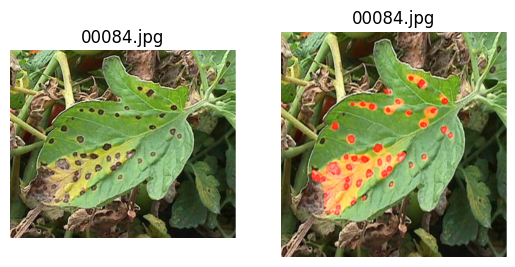

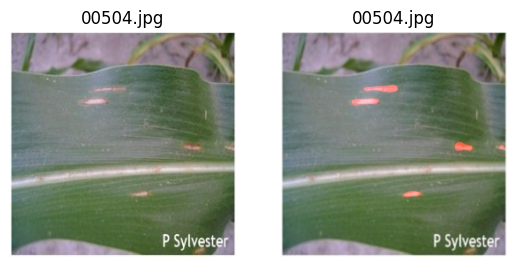

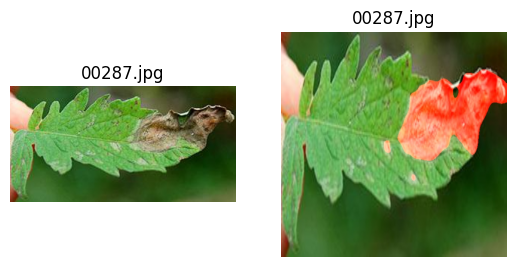

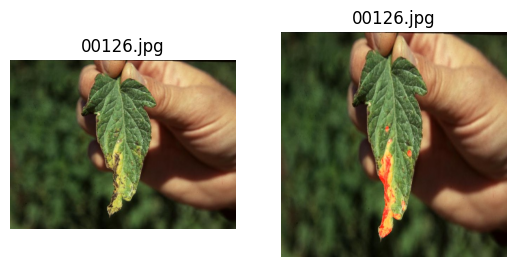

In [46]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Rows to visualize
num_rows = 4

# Set the path to your folder containing images
folder_path_1 = "/content/FasterViT/input/leaf_disease_segmentation/orig_data/valid_images"
folder_path_2 = "/content/FasterViT/outputs/inference_results_image"

# Get a list of all the image files in the folder
image_files = [f for f in os.listdir(folder_path_1) if os.path.isfile(os.path.join(folder_path_1, f))]

for i in range(num_rows):

  # Select a random image file
  random_image = random.choice(image_files)

  # Load and display the image from the first folder
  image_path_1 = os.path.join(folder_path_1, random_image)
  img_1 = mpimg.imread(image_path_1)
  plt.subplot(1, 2, 1)
  plt.imshow(img_1)
  plt.title(random_image)
  plt.axis('off')

  # Load and display the image with the same name from the second folder
  image_path_2 = os.path.join(folder_path_2, random_image)
  img_2 = mpimg.imread(image_path_2)
  plt.subplot(1, 2, 2)
  plt.imshow(img_2)
  plt.title(random_image)
  plt.axis('off')

  plt.show()